In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 104s 1us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
import tensorflow as tf

In [5]:
tf.reset_default_graph()
num_classes = 10


In [6]:
X=tf.placeholder(tf.float32,[None,32,32,3])
Y=tf.placeholder(tf.int64,[None,1])
X_exend=tf.reshape(X,[-1,32,32,3])
Y_onehot=tf.one_hot(indices=Y,depth=num_classes)

In [7]:
convol1=tf.get_variable("convol1",[3,3,3,64],initializer=tf.random_normal_initializer(stddev=1e-2))
conv1=tf.get_variable("conv1",[64],initializer=tf.random_normal_initializer(stddev=1e-2))
conv2d=tf.nn.conv2d(X_exend,convol1,strides=[1,1,1,1],padding='SAME')+conv1
relu_layer1=tf.nn.relu(conv2d)
pool_layer1=tf.nn.max_pool(value=relu_layer1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
convol2=tf.get_variable("convol2",[3,3,64,64],initializer=tf.random_normal_initializer(stddev=1e-2))
conv2=tf.get_variable("conv2",[64],initializer=tf.random_normal_initializer(stddev=1e-2))
conv2d1=tf.nn.conv2d(pool_layer1,convol2,strides=[1,1,1,1],padding='SAME')+conv2
relu_layer2=tf.nn.relu(conv2d1)
pool_layer2=tf.nn.max_pool(value=relu_layer2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


In [9]:
convol3=tf.get_variable("convol3",[3,3,64,64],initializer=tf.random_normal_initializer(stddev=1e-2))
conv3=tf.get_variable("conv3",[64],initializer=tf.random_normal_initializer(stddev=1e-2))
conv2d2=tf.nn.conv2d(pool_layer2,convol3,strides=[1,1,1,1],padding='SAME')+conv3
relu_layer3=tf.nn.relu(conv2d2)


In [10]:
print(relu_layer3)

Tensor("Relu_2:0", shape=(?, 8, 8, 64), dtype=float32)


In [11]:
flatten1=tf.reshape(relu_layer3,[-1,8*8*64])
fc1=tf.layers.dense(inputs=flatten1,units=512,activation=tf.nn.relu,use_bias=True)
fc2=tf.layers.dense(inputs=fc1,units=512,activation=tf.nn.relu,use_bias=True)
output=tf.layers.dense(inputs=fc2,units=num_classes,activation=None,use_bias=True)
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_onehot,logits=output))
accu=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output,axis=1),Y[:,0]),dtype=tf.float32))
opt=tf.train.AdamOptimizer(0.0001).minimize(loss)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [12]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [13]:
from tqdm import tqdm_notebook as tqdm
epochs=10
batch_size=64
for epoch in range(0,epochs):
    for step in tqdm(range(int(len(x_train)/batch_size)),desc=('epoch'+str(epoch))):
        x_batch=x_train[step*batch_size:step*batch_size+batch_size]
        y_batch=y_train[step*batch_size:step*batch_size+batch_size]
        loss_value,_=sess.run([loss,opt],feed_dict={X:x_batch,Y:y_batch})
    loss_value,accuracy_value=sess.run([loss,accu],feed_dict={X:x_test[:1000],Y:y_test[:1000]})
    print('epoch loss:',loss_value,'accuracy:',accuracy_value)


epoch loss: 1.1799766 accuracy: 0.595



epoch loss: 1.0016615 accuracy: 0.649



epoch loss: 0.87341344 accuracy: 0.687



epoch loss: 0.841194 accuracy: 0.715



epoch loss: 0.89435446 accuracy: 0.705



epoch loss: 0.94306225 accuracy: 0.684



epoch loss: 0.8805813 accuracy: 0.7



epoch loss: 0.896913 accuracy: 0.719



epoch loss: 1.0413847 accuracy: 0.699



epoch loss: 1.1267755 accuracy: 0.699


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(3, 3, 3, 64)


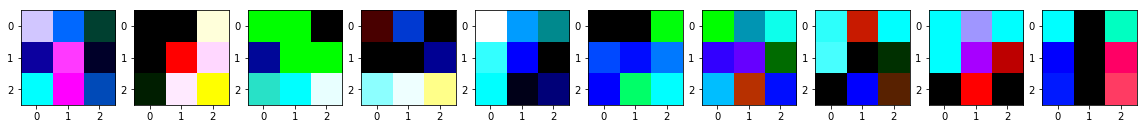

In [14]:
import numpy as np




from matplotlib.pyplot import *
import matplotlib.pyplot as plt


con_filter=sess.run(convol1)
print(con_filter.shape)
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(np.reshape(con_filter[:,:,:,i]*100, [3,3,3]))


(1, 32, 32, 64)


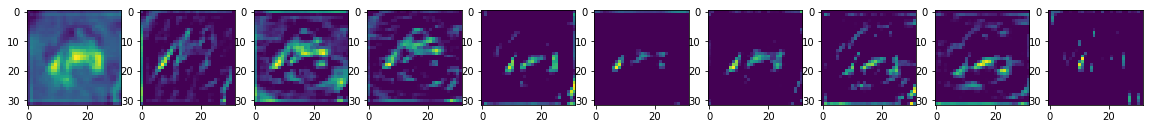

In [15]:
import numpy as np




from matplotlib.pyplot import *
import matplotlib.pyplot as plt


fmaps=sess.run(relu_layer1,feed_dict={X:[x_train[0]]})
print(fmaps.shape)
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(np.reshape(fmaps[:,:,:,i], [32,32]))
